<a href="https://colab.research.google.com/github/cbadenes/notebooks/blob/main/probabilistic_topic_models/TBFY_Crosslingual_SearchAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **cross-lingual search API** for exploring public contracts in the European Union

# Why?

[TheyBuyForYou](https://theybuyforyou.eu/) collects, annotates and organizes large amounts of public procurement data in the European Union.

Let's explore its content through a set of questions!

## What types of documents are available?

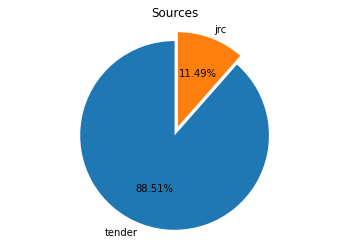

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

params = {
    "facet.field":"source_s",
    "facet":"on",
    "q":"*:*"
}

url="http://librairy.linkeddata.es/data/tbfy/select"
resp = requests.get(url=url, params=params)
data = resp.json()
data_types = data['facet_counts']['facet_fields']['source_s']

data_sources = [lang for lang in data_types if isinstance(lang, str)][:-1]
frequencies = [freq for freq in data_types if isinstance(freq, int)][:-1]

#df = pd.DataFrame(frequencies, index=data_sources, columns=['x'])
 
#df.plot(kind='pie', subplots=True, figsize=(5, 5))


plt.pie(frequencies, labels=data_sources,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('Sources')
plt.show()

## What are they about?

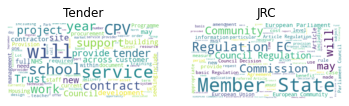

In [5]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import requests
import matplotlib.pyplot as plt
import numpy as np

def retrieve_texts(source):
  params = {
    "start":"0",
    "rows":"100",
    "fl":"txt_t",
    "q":"lang_s:en & source_s:"+source
  }
  url="http://librairy.linkeddata.es/data/tbfy/select"
  resp = requests.get(url=url, params=params)
  data = resp.json()
  texts = [txt['txt_t'] for txt in data['response']['docs'] ]
  text = ' '.join(texts)
  return text


plt.figure()

plt.subplot(1, 2, 1).set_title("Tender")
plt.plot()
plt.imshow(WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords = set(STOPWORDS)).generate(retrieve_texts("tender")), interpolation="bilinear")
plt.axis("off")

plt.subplot(1, 2, 2).set_title("JRC")
plt.plot()
plt.imshow(WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords = set(STOPWORDS)).generate(retrieve_texts("jrc")), interpolation="bilinear")
plt.axis("off")

plt.show()

## How many different languages are there?

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np

params = {
    "facet.field":"lang_s",
    "facet":"on",
    "q":"*:*"
}

url="http://librairy.linkeddata.es/data/tbfy/select"
resp = requests.get(url=url, params=params)
data = resp.json()
language_data = data['facet_counts']['facet_fields']['lang_s']

languages = [lang for lang in language_data if isinstance(lang, str)]
y_pos = np.arange(len(languages))
frequencies = [freq for freq in language_data if isinstance(freq, int)]
plt.bar(y_pos, frequencies, align='center', alpha=0.5)

plt.xticks(y_pos, languages)
plt.ylabel('#Docs')
plt.title('Languages')
plt.rcParams["figure.figsize"] = [200, 5]


## Are these texts long?

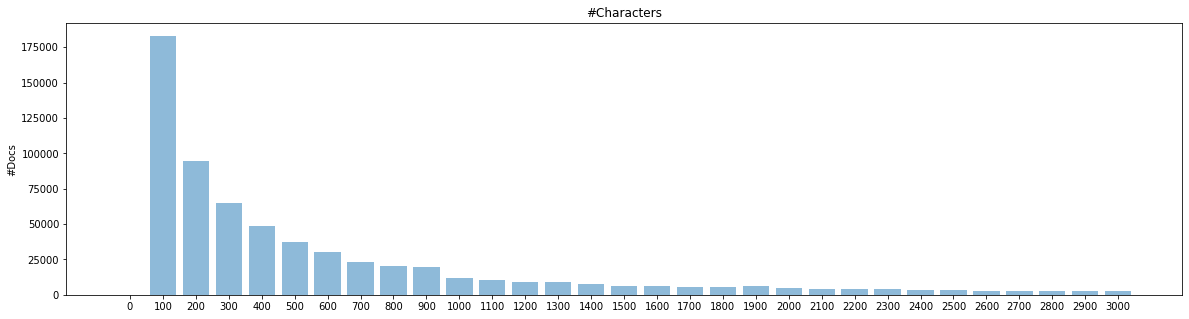

In [7]:
import requests
import matplotlib.pyplot as plt
import numpy as np

params = {
    "facet.range":"size_i",
    "facet.range.start":"0",
    "facet.range.end":"3001",
    "facet.range.gap":"100",
    "facet":"on",
    "q":"*:*"
}

url="http://librairy.linkeddata.es/data/tbfy/select"
resp = requests.get(url=url, params=params)
data = resp.json()
facet_data = data['facet_counts']['facet_ranges']['size_i']['counts']

sizes = [size for size in facet_data if isinstance(size, str)]
y_pos = np.arange(len(sizes))
frequencies = [freq for freq in facet_data if isinstance(freq, int)]
plt.bar(y_pos, frequencies, align='center', alpha=0.5)

plt.xticks(y_pos, sizes)
plt.ylabel('#Docs')
plt.title('#Characters')
plt.rcParams["figure.figsize"] = [20, 5]

# What does **SearchAPI** offer me?

**SearchAPI** finds *similar texts* regardless of the *language*. 

So if we consider **organizations** and **contracts** rather than only texts, SearchAPI helps us **find organizations that have participated in contracts related to a given description**.

In [8]:
#@title Enter a description 

text = 'Food consumption data are essential for assessing how exposed people are to potential risks in the food chain.' #@param {type:"string"}

print("reference text updated")

reference text updated


## Texts related across languages

We can use the [Search API](https://github.com/TBFY/search-API) service to search for tenders related to that procurement text:

In [9]:
import requests

def retrieve_documents(request):
  base_url = 'https://tbfy.librairy.linkeddata.es/search-api'
  resp = requests.post(base_url+'/items', json=request)
  if resp.status_code != 200:
    # This means something went wrong.
    print('POST /items/ {}'.format(resp.status_code))
    pass
  return resp.json()    
  

def search_documents(request):
  i=1
  for document in retrieve_documents(request):
    print('[{}] {}'.format(i, document))
    i+=1  

request = {"source": "tender", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0133-183447-2020_183447-2020_td', 'name': 'DIN 18353 Estricharbeiten', 'score': 2888.64453125}
[2] {'id': 'ocds-0c46vo-0133-045906-2020_045906-2020_td', 'name': 'Achat de denrées alimentaires pour la restauration scolaire de Vezin-le-Coquet', 'score': 2888.64453125}
[3] {'id': 'ocds-0c46vo-0117-163236_163236', 'name': 'The development of a branding strategy for the Kilkenny Food Strategy 2020- 2025', 'score': 2888.64453125}
[4] {'id': 'ocds-0c46vo-0117-160742_160742', 'name': 'Feasibility study on development pathway for a Food Verification & Certification System for the Kilkenny region.', 'score': 2888.64453125}
[5] {'id': 'ocds-0c46vo-0022-NOV317039_NOV317039', 'name': 'tFood Hygiene Inspections', 'score': 2888.64453125}
[6] {'id': 'ocds-0c46vo-0022-FEB327117_FEB327117', 'name': 'Food Hygene Inspections', 'score': 2888.64453125}
[7] {'id': 'ocds-0c46vo-0020-sandwellmbc_2832_sandwellmbc_2832', 'name': 'Quotation for Official Food Control Inspectons 2019/20', 's

The above search was tuned to retrieve documents describing tenders (i.e `source = tender`, that are related to a given text (i.e. `text='procurement_text'`), and only the top 10 were retrieved (i.e. `size=10`).

Each search result contains the document identifier, the name and a numerical value to illustrate the level of relationship to the reference text (e.g. `'score': 2794.13`).

The search service can be currently filtered by the following parameters: `size`, `source`, `terms`, `name` and `lang`. **All of them can be freely combined.**

#### Filtering by language

The language parameter `lang` follows the [ISO 639-1 Code](https://www.iso.org/iso-639-language-codes.html). The service currently supports the following languages: English (`en`), Spanish (`es`), French(`fr`), Italian(`it`) and Portuguese(`pt`).

Let's now search for related documents written in Spanish:

In [10]:
request = {"source": "tender", "size": "10", "text" : text, "lang": "es" }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0321-612544_612544', 'name': 'AMT-2019-0060:Servizo  de desenvolvemento, mantemento evolutivo e soporte dun sistema de información de xestión de prestación de servizos  da Axencia Galega de Calidade Alimentaria (AGACAL)', 'score': 2819.64599609375}
[2] {'id': 'ocds-0c46vo-0133-594378-2019_594378-2019_td', 'name': 'Suministro agregado de material fungible para el soporte nutricional enteral para los centros del Institut Català de la Salut complementario', 'score': 2819.64599609375}
[3] {'id': 'ocds-0c46vo-0133-509546-2019_509546-2019_td', 'name': 'Suministro de viveres con destino al Hospital de Barbastro', 'score': 2819.64599609375}
[4] {'id': 'ocds-0c46vo-0133-260820-2019_260820-2019_td', 'name': 'Suministro de productos farmacéuticos para la fluidoterapia, soluciones para nutriciones parenterales y soluciones de irrigación', 'score': 2819.64599609375}
[5] {'id': 'ocds-0c46vo-0133-253105-2019_253105-2019_td', 'name': 'Contrato de servicio de catering en las esc

#### Filtering by source

Currently, both the tender descriptions retrieved from the TBFY Knowledge-Graph (i.e. `source=tender`) and the legal texts published in the JRC-Acquis dataset (i.e. `source=jrc`) are available through the web service . 

If the `source` parameter is missing, no filtering is done:

In [11]:
request = {"size": "10", "text" : text }
search_documents(request)

[1] {'id': 'jrc52006AG0002-en', 'name': 'Common Position (EC) No 2/2006 of  8 December 2005  adopted by the Council, acting in accordance with the procedure referred to in Article 251 of the Treaty establishing the European Community, with a view to adopting a regulation of the European Parliament and of the Council on the addition of vitamins and minerals and of certain other substances to foods', 'score': 2888.64453125}
[2] {'id': 'jrc32004L0001-en', 'name': 'Commission Directive 2004/1/EC of 6 January 2004 amending Directive 2002/72/EC as regards the suspension of the use of azodicarbonamide as blowing agent (Text with EEA relevance)', 'score': 2888.64453125}
[3] {'id': 'jrc32003L0114-en', 'name': 'Directive 2003/114/EC of the European Parliament and of the Council of 22 December 2003 amending Directive 95/2/EC on food additives other than colours and sweeteners', 'score': 2888.64453125}
[4] {'id': 'jrc32002L0046-en', 'name': 'Directive 2002/46/EC of the European Parliament and of t

We can search through tenders (i.e. `source=tender`):

In [12]:
request = {"source":"tender", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'ocds-0c46vo-0133-183447-2020_183447-2020_td', 'name': 'DIN 18353 Estricharbeiten', 'score': 2888.64453125}
[2] {'id': 'ocds-0c46vo-0133-045906-2020_045906-2020_td', 'name': 'Achat de denrées alimentaires pour la restauration scolaire de Vezin-le-Coquet', 'score': 2888.64453125}
[3] {'id': 'ocds-0c46vo-0117-163236_163236', 'name': 'The development of a branding strategy for the Kilkenny Food Strategy 2020- 2025', 'score': 2888.64453125}
[4] {'id': 'ocds-0c46vo-0117-160742_160742', 'name': 'Feasibility study on development pathway for a Food Verification & Certification System for the Kilkenny region.', 'score': 2888.64453125}
[5] {'id': 'ocds-0c46vo-0022-NOV317039_NOV317039', 'name': 'tFood Hygiene Inspections', 'score': 2888.64453125}
[6] {'id': 'ocds-0c46vo-0022-FEB327117_FEB327117', 'name': 'Food Hygene Inspections', 'score': 2888.64453125}
[7] {'id': 'ocds-0c46vo-0020-sandwellmbc_2832_sandwellmbc_2832', 'name': 'Quotation for Official Food Control Inspectons 2019/20', 's

Or among European Union legal texts (i.e `source=jrc`):

In [13]:
request = {"source":"jrc", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'jrc52006AG0002-en', 'name': 'Common Position (EC) No 2/2006 of  8 December 2005  adopted by the Council, acting in accordance with the procedure referred to in Article 251 of the Treaty establishing the European Community, with a view to adopting a regulation of the European Parliament and of the Council on the addition of vitamins and minerals and of certain other substances to foods', 'score': 2888.64453125}
[2] {'id': 'jrc32004L0001-en', 'name': 'Commission Directive 2004/1/EC of 6 January 2004 amending Directive 2002/72/EC as regards the suspension of the use of azodicarbonamide as blowing agent (Text with EEA relevance)', 'score': 2888.64453125}
[3] {'id': 'jrc32003L0114-en', 'name': 'Directive 2003/114/EC of the European Parliament and of the Council of 22 December 2003 amending Directive 95/2/EC on food additives other than colours and sweeteners', 'score': 2888.64453125}
[4] {'id': 'jrc32002L0046-en', 'name': 'Directive 2002/46/EC of the European Parliament and of t

In any case, the search can also be filtered by a particular language, for example French (i.e. `lang=fr`):

In [15]:
request = {"lang": "fr", "source":"jrc", "size": "10", "text" : text }
search_documents(request)

[1] {'id': 'jrc52005AP0202-fr', 'name': "Résolution législative du Parlement européen sur la proposition de règlement du Parlement européen et du Conseil concernant l'adjonction de vitamines, de substances minérales et de certaines autres substances aux denrées alimentaires (COM(2003)0671 - C5-0538/2003 - 2003/0262(COD))", 'score': 2888.64453125}
[2] {'id': 'jrc32005L0079-fr', 'name': "Directive 2005/79/CE de la Commission du 18 novembre 2005 portant modification de la directive 2002/72/CE concernant les matériaux et objets en matière plastique destinés à entrer en contact avec les denrées alimentaires   (Texte présentant de l'intérêt pour l'EEE)", 'score': 2888.64453125}
[3] {'id': 'jrc32004L0077-fr', 'name': "Directive 2004/77/CE de la Commission du 29 avril 2004 modifiant la directive 94/54/CE en ce qui concerne l'étiquetage de certaines denrées alimentaires contenant de l'acide glycyrrhizinique et son sel d'ammonium (Texte présentant de l'intérêt pour l'EEE)", 'score': 2888.6445312

#### Filtering by Terms

You can also filter by documents containing certain words. Just add the `terms` parameter with the exact sequence of words you want the documents to contain. Please be careful with upper and lower case. 

In [16]:
request = { "terms": "animal", "source":"tender", "size": "10", "text": text}
search_documents(request)

[1] {'id': 'ocds-0c46vo-0117-146520_146520', 'name': 'Veterinary Services Bantry Area', 'score': 2888.64453125}
[2] {'id': 'ocds-0c46vo-0117-151181_151181', 'name': 'Veterinary Services - Bantry Area', 'score': 2822.042236328125}
[3] {'id': 'ocds-0c46vo-0005-42369_42369', 'name': 'FSA657 - Literature Reviews', 'score': 2822.042236328125}
[4] {'id': 'ocds-0c46vo-0133-269538-2019_269538-2019_td', 'name': 'Yardleys School — Tender for Catering Services', 'score': 2819.64599609375}
[5] {'id': 'ocds-0c46vo-0133-266296-2019_266296-2019_td', 'name': 'Waverley School and Waverley Studio College — Tender for Catering Services', 'score': 2819.64599609375}
[6] {'id': 'ocds-0c46vo-0133-165744-2020_165744-2020_td', 'name': 'Al-Furqan Primary School — Catering Tender', 'score': 2819.64599609375}
[7] {'id': 'ocds-0c46vo-0022-APR330717_APR330717', 'name': 'Al-Furqan Primary School — Catering Tender', 'score': 2819.64599609375}
[8] {'id': 'ocds-0c46vo-0020-birminghamcc_1830_birminghamcc_1830', 'name': 

#### Filtering by Name

You can also filter by document name, or part of the name. Again, be careful with upper and lower case.  Just use the `name` parameter

The special character `*` expresses any word in that position. So if you want its name to start with `Security` the filter should be `name=Security*`:


In [17]:
request = { "name" : "*Certification*", "source":"tender", "size": "10", "text": text}
search_documents(request)

[1] {'id': 'ocds-0c46vo-0117-160742_160742', 'name': 'Feasibility study on development pathway for a Food Verification & Certification System for the Kilkenny region.', 'score': 2888.64453125}


## Browse the TBFY Knowledge Graph

The **ID** field returned by **SearchAPI** for each **document** corresponds to the **identifier** used by the **KG**

Once we have the list of related documents, we can directly use their `id` and `source` attributes to read the resource in the Knowledge-Graph.


In [18]:
def retrieve_tenders(request):
  documents = retrieve_documents(request)
  tenders = []
  for document in documents:
    id = document['id']
    tender = requests.get('https://tbfy.librairy.linkeddata.es/kg-api/tender/'+id).json()
    tenders.append(tender)
  return tenders

def search_tenders(request):
  tenders = retrieve_tenders(request)
  i=1
  for tender in tenders:
    status = "unknown"
    title = "unknown"
    id = "unknown"
    if ('status' in tender):
        status = tender['status']
    if ('title' in tender):        
        title = tender['title']
    if ('id' in tender):
      id = tender['id']
    print('[{}] [{}] "{} ({})"'.format(i,status, title, id))    
    i+=1

print("Search for tenders in KG is ready")

Search for tenders in KG is ready


#### Reading tenders from KG

We can easily read the `status` of the **tenders** in the KG from the **documents** found in the **Search-API**:

In [20]:
search_tenders({ "source":"tender","size": "10", "text": text})

JSONDecodeError: ignored

We can **combine** the above **filters** to *improve* searches:

In [ ]:
search_tenders({ "lang":"es", "source":"tender","size": "10", "text": text})

#### Reading suppliers of related tenders

In [ ]:
def get_contracting_process(tender_id):
  resp = requests.get('https://tbfy.librairy.linkeddata.es/kg-api/tender/'+tender_id+"/contractingProcess")
  if resp.status_code != 200:
    # This means something went wrong.
    print('GET /tender/contracting_process {}'.format(resp.status_code))
    pass
  return resp.json() 

def get_buyer(contracting_process_id):
  resp = requests.get('https://tbfy.librairy.linkeddata.es/kg-api/contractingProcess/'+contracting_process_id+"/buyer")
  if resp.status_code != 200:
    # This means something went wrong.
    print('GET /contracting_process {}'.format(resp.status_code))
    pass
  return resp.json() 

def search_buyers(request):
  tenders = retrieve_tenders(request)
  i = 1
  for tender in tenders:
    if ('id' not in tender):
        continue
    contracting_processes = get_contracting_process(tender['id'])
    for contracting_process in contracting_processes:
      buyers = get_buyer(contracting_process['id'])
      print(buyers)
      for buyer in buyers:
        #print(buyer)
        if buyer.get('organisation'):
          print('[{}] {} {}'.format(i,buyer['legalName'], buyer['organisation']))
    i+=1

print("KG links are ready")

Explore the **KG** to identify the **buyers** that have participated in the **tenders** related to our *reference text*:

In [ ]:
request = { "source":"tender","size": "20", "text": text}
search_buyers(request)

And they can be **filtered** through any of the filters seen above, for example by **language**:

In [ ]:
request = { "lang":"es", "source":"tender","size": "10", "text": text}
search_buyers(request)